# Machine Learning e Data Science com Python de A à Z (Classificacão) - IA Expert Academy

# Importação das bibliotecas básicas

In [1]:
!pip install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

### Exploração dos dados

In [3]:
base_credit = pd.read_csv('/content/credit_data.csv')

In [4]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [5]:
base_credit.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [6]:
base_credit.tail(8)

,clientid,income,age,loan,default
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [7]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [8]:
base_credit[base_credit['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [9]:
base_credit[base_credit['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


### Visualização dos dados

In [10]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

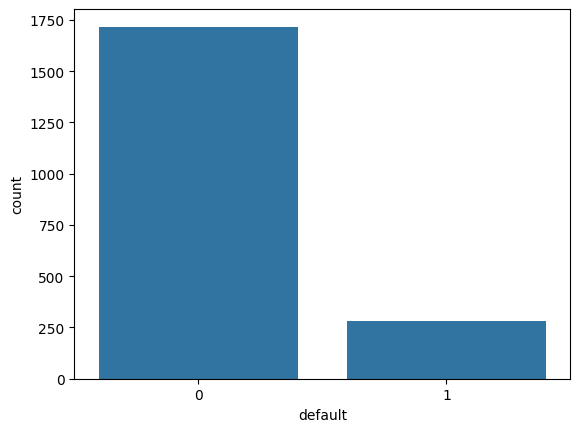

In [11]:
sns.countplot(x = base_credit['default']);

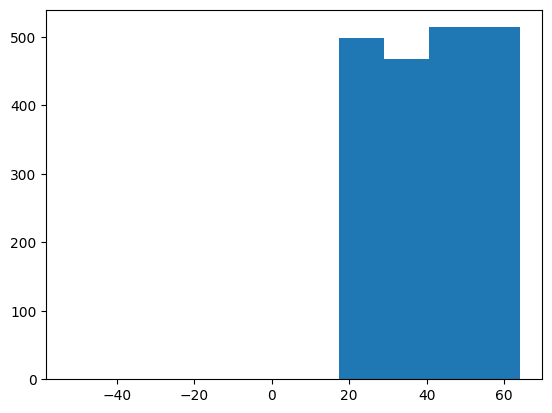

In [12]:
plt.hist(x = base_credit['age']);

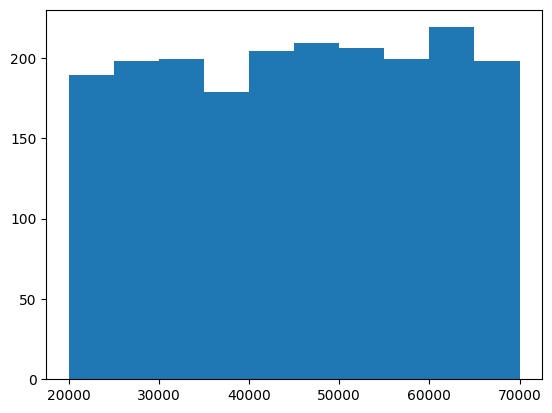

In [13]:
plt.hist(x = base_credit['income']);

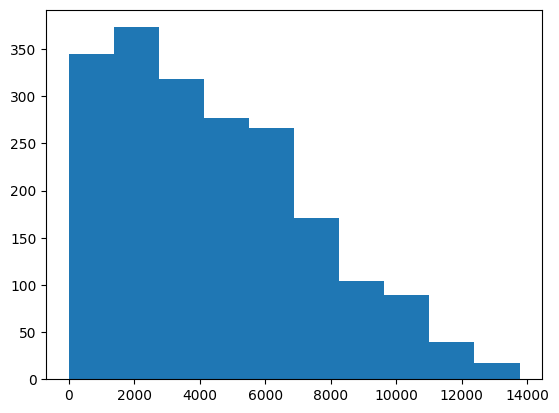

In [14]:
plt.hist(x = base_credit['loan']);

In [15]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

### Tratamento de valores inconsistentes

In [16]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [17]:
base_credit[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [18]:
base_credit2 = base_credit.drop('age', axis = 1)
base_credit2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [19]:
base_credit.index

RangeIndex(start=0, stop=2000, step=1)

In [20]:
base_credit[base_credit['age'] < 0].index

Index([15, 21, 26], dtype='int64')

In [21]:
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [22]:
base_credit3.loc[base_credit3['age'] < 0]

,clientid,income,age,loan,default


In [23]:
# Preencher os valores inconsistente manualmente

In [24]:
# Preencher a média

In [25]:
base_credit.mean()

,0
clientid,1000.500000
income,45331.600018
age,40.807559
loan,4444.369695
default,0.141500


In [26]:
base_credit['age'].mean()

np.float64(40.80755937840458)

In [27]:
base_credit['age'][base_credit['age'] > 0].mean()

np.float64(40.92770044906149)

In [28]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [29]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default


In [30]:
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


### Tratamento de valores faltantes

In [31]:
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [32]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [33]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [35]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

/tmp/ipython-input-1787667511.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [36]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [37]:
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [38]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


<h1>-------------- Parei aqui -----------------</h1>

### Divisão entre previsores e classe

In [ ]:
type(base_credit)

In [ ]:
X_credit = base_credit.iloc[:, 1:4].values

In [ ]:
X_credit

In [ ]:
type(X_credit)

In [ ]:
y_credit = base_credit.iloc[:, 4].values

In [ ]:
y_credit

In [ ]:
type(y_credit)

### Escalonamento dos valores

In [ ]:
X_credit

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

In [ ]:
X_credit

# Base de dados do censo

- Fonte: https://archive.ics.uci.edu/ml/datasets/adult

## Exploração dos dados

## Visualização dos dados

## Divisão entre previsores e classe

In [ ]:
base_census.columns

In [ ]:
X_census = base_census.iloc[:, 0:14].values

In [ ]:
X_census

In [ ]:
X_census[0]

In [ ]:
y_census = base_census.iloc[:, 14].values

In [ ]:
y_census

## Tratamento de atributos categóricos

### LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_teste = LabelEncoder()

In [ ]:
X_census[:,1]

In [ ]:
teste = label_encoder_teste.fit_transform(X_census[:,1])

In [ ]:
teste

In [ ]:
X_census[0]

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census[0]

In [ ]:
X_census

### OneHotEncoder

In [ ]:
# Carro

# Gol Pálio Uno
#   1     2   3

# Gol   1 0 0
# Pálio 0 1 0
# Uno   0 0 1 # encode

In [ ]:
len(np.unique(base_census['workclass'])) # 1 0 0 0 0 0 0 0, 0 0 0 0 1 0 0 0 0

In [ ]:
len(np.unique(base_census['occupation']))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [ ]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
X_census

In [ ]:
X_census[0]

In [ ]:
X_census.shape

## Escalonamento dos valores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

# Divisão das bases em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

## Credit data

In [ ]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [ ]:
X_credit_treinamento.shape

In [ ]:
y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

## Census

In [ ]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

## Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

# Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

## Base risco de crédito

In [ ]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
base_risco_credito

In [ ]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

In [ ]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [ ]:
X_risco_credito

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [ ]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

In [ ]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [ ]:
previsao

In [ ]:
naive_risco_credito.classes_

In [ ]:
naive_risco_credito.class_count_

In [ ]:
naive_risco_credito.class_prior_

## Base credit data - 93.80%

In [ ]:
import pickle
with open('/content/census.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [ ]:
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

In [ ]:
confusion_matrix(y_credit_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

## Base census - 47.67%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
accuracy_score(y_census_teste, previsoes) # não executar o escalonamento

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Árvores de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Base risco de crédito

In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
X_risco_credito

In [ ]:
y_risco_credito

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

In [ ]:
arvore_risco_credito.feature_importances_

In [ ]:
arvore_risco_credito.classes_

In [ ]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True);

In [ ]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

## Base credit data - 98.20%

In [ ]:
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

In [ ]:
arvore_credit.classes_

In [ ]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

## Base census - 81.04%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
#cm = ConfusionMatrix(arvore_credit) corrigido 10/04/2021
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Base credit data - 98.40%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = random_forest_credit.predict(X_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

## Base census - 85.07%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
y_census_treinamento

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = random_forest_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Regras

In [ ]:
# ATUALIZAÇÃO MAI-2025: é preciso explicitar a versão do Orange durante a instalação, conforme abaixo.
# Depois de rodar esta célula, o Colab vai sugerir reiniciar o ambiente de execução, mas não é necessário.
!pip install Orange3==3.36.2

In [ ]:
import Orange

## Base risco de crédito

In [ ]:
base_risco_credito = Orange.data.Table('risco_credito_regras.csv')

In [ ]:
base_risco_credito

In [ ]:
base_risco_credito.domain

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [ ]:
for regras in regras_risco_credito.rule_list:
  print(regras)

In [ ]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

In [ ]:
base_risco_credito.domain.class_var.values

In [ ]:
for i in previsoes:
  #print(i)
  print(base_risco_credito.domain.class_var.values[i])

## Base credit data - 97.40%

In [ ]:
base_credit = Orange.data.Table('/content/credit_data_regras.csv')

In [ ]:
base_credit.domain

In [ ]:
base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25)

In [ ]:
base_dividida

In [ ]:
base_dividida[0]

In [ ]:
base_dividida[1]

In [ ]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [ ]:
len(base_treinamento), len(base_teste)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [ ]:
for regras in regras_credit.rule_list:
  print(regras)

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])

In [ ]:
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

## Base census - 78.90% (executado na interface gráfica do Orange)

# Classificador base - Majority learner

## Base credit data - 85.85%

In [ ]:
base_credit = Orange.data.Table('credit_data_regras.csv')

In [ ]:
base_credit.domain

In [ ]:
majority = Orange.classification.MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit, base_credit, [majority])

In [ ]:
Orange.evaluation.CA(previsoes)

In [ ]:
for registro in base_credit:
  print(registro.get_class())

In [ ]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit)

In [ ]:
1717 / 2000

## Base census - 75.91%

In [ ]:
base_census = Orange.data.Table('census_regras.csv')

In [ ]:
base_census.domain

In [ ]:
majority = Orange.classification.MajorityLearner()
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])
Orange.evaluation.CA(previsoes)

In [ ]:
Counter(str(registro.get_class()) for registro in base_census)

In [ ]:
24720 / (24720 + 7841)

# Aprendizagem baseada em instâncias - knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Base credit data - 98.60%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = knn_credit.predict(X_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

## Base census - 82.90%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = knn_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

## Base risco de crédito

In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
X_risco_credito

In [ ]:
y_risco_credito # 2, 7, 11

In [ ]:
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)

In [ ]:
X_risco_credito

In [ ]:
y_risco_credito

In [ ]:
logistic_risco_credito = LogisticRegression(random_state = 1)
logistic_risco_credito.fit(X_risco_credito, y_risco_credito)

In [ ]:
logistic_risco_credito.intercept_

In [ ]:
logistic_risco_credito.coef_

In [ ]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes1 = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes1

## Base credit data - 94.60%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
logistic_credit.intercept_

In [ ]:
logistic_credit.coef_

In [ ]:
previsoes = logistic_credit.predict(X_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

## Base census - 84.95%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
logistic_census = LogisticRegression(random_state = 1)
logistic_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = logistic_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# SVM

In [ ]:
from sklearn.svm import SVC

## Base credit data - 98.80%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = svm_credit.predict(X_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

## Base census - 85.07%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
svm_census = SVC(kernel='linear', random_state=1)
svm_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = svm_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Redes neurais artificiais

In [ ]:
from sklearn.neural_network import MLPClassifier

## Base credit data - 99.80%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
(3 + 1) / 2

In [ ]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = rede_neural_credit.predict(X_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

## Base census - 81.53%

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
(108 + 1) / 2

In [ ]:
# 108 -> 55 -> 55 -> 1
rede_neural_census = MLPClassifier(verbose=True, max_iter = 1000, tol=0.000010,
                                  hidden_layer_sizes = (55,55))
rede_neural_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = rede_neural_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Avaliação dos algoritmos

- Naïve Bayes: 93.80
- Árvore de decisão: 98.20
- Random forest: 98.40
- Regras: 97.40
- Knn: 98.60
- Regressão logística: 94.60
- SVM: 98.80
- Redes neurais: 99.60

## Tuning dos parâmetros com GridSearch

### Preparação dos dados

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

In [ ]:
X_credit

In [ ]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

In [ ]:
y_credit

### Árvore de decisão

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

### Random forest

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

### Knn

In [ ]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

### Regressão logística

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

### SVM

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

### Redes neurais

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

## Validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
10 * 30

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())


In [ ]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

In [ ]:
resultados.describe()

In [ ]:
resultados.var()

In [ ]:
(resultados.std() / resultados.mean()) * 100

## Teste de normalidade nos resultados

- Shapiro: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

In [ ]:
sns.displot(resultados_arvore, kind = 'kde');

In [ ]:
sns.displot(resultados_random_forest, kind = 'kde');

In [ ]:
sns.displot(resultados_knn, kind = 'kde');

In [ ]:
sns.displot(resultados_logistica, kind = 'kde');

In [ ]:
sns.displot(resultados_svm, kind = 'kde');

In [ ]:
sns.displot(resultados_rede_neural, kind = 'kde');

## Teste de hipótese com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

In [ ]:
resultados.mean()

In [ ]:
teste_estatistico.plot_simultaneous();

# Salvar um classificador já treinado

In [ ]:
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)

In [ ]:
X_credit.shape, y_credit.shape

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

In [ ]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

In [ ]:
classificador_svm = SVC(C = 2.0, kernel='rbf', probability=True)
classificador_svm.fit(X_credit, y_credit)

In [ ]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

# Carregar um classificador já treinado

In [ ]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [ ]:
novo_registro = X_credit[1999]
novo_registro

In [ ]:
novo_registro.shape

In [ ]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

In [ ]:
novo_registro

In [ ]:
rede_neural.predict(novo_registro)

In [ ]:
arvore.predict(novo_registro)

In [ ]:
svm.predict(novo_registro)

# Combinação de classificadores

In [ ]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

In [ ]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [ ]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

In [ ]:
paga = 0
nao_paga = 0

if resposta_rede_neural[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_arvore[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_svm[0] == 1:
  nao_paga += 1
else:
  paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo')
elif paga == nao_paga:
  print('Empate')
else:
  print('Cliente não pagará o empréstimo')

# Rejeição de classificadores

In [ ]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

In [ ]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [ ]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

In [ ]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_rede_neural

In [ ]:
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_rede_neural

In [ ]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

In [ ]:
probabilidade_svm = svm.predict_proba(novo_registro)
confianca_svm = probabilidade_svm.max()
confianca_svm

In [ ]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos = 0

if confianca_rede_neural >= confianca_minima:
  algoritmos += 1
  if resposta_rede_neural[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_arvore >= confianca_minima:
  algoritmos += 1
  if resposta_arvore[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_svm >= confianca_minima:
  algoritmos += 1
  if resposta_svm[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))
elif paga == nao_paga:
  print('Empate, baseado em {} algoritmos'.format(algoritmos))
else:
  print('Cliente não pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))

# Redução de dimensionalidade

## Preparacão da base de dados

In [ ]:
base_census = pd.read_csv('/content/census.csv')
base_census

In [ ]:
X_census = base_census.iloc[:, 0:14].values
X_census

In [ ]:
y_census = base_census.iloc[:, 14].values
y_census

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census[0]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census

In [ ]:
from sklearn.model_selection import train_test_split
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

In [ ]:
X_census_treinamento.shape, X_census_teste.shape

## PCA (Principal component analysis)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=8)

In [ ]:
X_census_treinamento_pca = pca.fit_transform(X_census_treinamento)
X_census_testes_pca = pca.transform(X_census_teste)

In [ ]:
X_census_treinamento_pca.shape, X_census_testes_pca.shape

In [ ]:
X_census_treinamento

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_census_pca = RandomForestClassifier(n_estimators=40, random_state=0, criterion = 'entropy')
random_forest_census_pca.fit(X_census_treinamento_pca, y_census_treinamento)

In [ ]:
previsoes = random_forest_census_pca.predict(X_census_testes_pca)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

## Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=8, kernel='rbf')
X_census_treinamento_kpca = kpca.fit_transform(X_census_treinamento)
X_census_teste_kpca = kpca.transform(X_census_teste)

In [ ]:
X_census_treinamento_kpca.shape, X_census_teste_kpca.shape

In [ ]:
X_census_treinamento_kpca

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census_kpca = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
random_forest_census_kpca.fit(X_census_treinamento_kpca, y_census_treinamento)

In [ ]:
previsoes = random_forest_census_kpca.predict(X_census_teste_kpca)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

## LDA (Linear discriminant analysis)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 8)

In [ ]:
X_census_treinamento_lda = lda.fit_transform(X_census_treinamento, y_census_treinamento)
X_census_teste_lda = lda.transform(X_census_teste)

In [ ]:
X_census_treinamento_lda.shape, X_census_teste_lda.shape

In [ ]:
X_census_treinamento_lda

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census_lda = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
random_forest_census_lda.fit(X_census_treinamento_lda, y_census_treinamento)

In [ ]:
previsoes = random_forest_census_lda.predict(X_census_teste_lda)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

# Detecção de outliers

## Boxplot

In [ ]:
base_credit = pd.read_csv('credit_data.csv')
base_credit

In [ ]:
base_credit.isnull().sum()

In [ ]:
base_credit.dropna(inplace=True)

In [ ]:
base_credit.isnull().sum()

In [ ]:
1997 / 2

In [ ]:
# Outliers idade
grafico = px.box(base_credit, y = 'age')
grafico.show()

In [ ]:
outliers_age = base_credit[base_credit['age'] < 0]
outliers_age

In [ ]:
# Outliers loan
grafico = px.box(base_credit, y='loan')
grafico.show()

In [ ]:
outliers_loan = base_credit[base_credit['loan'] > 13300]
outliers_loan

## Gráfico de dispersão

In [ ]:
# Income x age
grafico = px.scatter(x = base_credit['income'], y = base_credit['age'])
grafico.show()

In [ ]:
# Income x loan
grafico = px.scatter(x = base_credit['income'], y = base_credit['loan'])
grafico.show()

In [ ]:
# Age x loan
grafico = px.scatter(x = base_credit['age'], y = base_credit['loan'])
grafico.show()

In [ ]:
base_census = pd.read_csv('census.csv')
base_census

In [ ]:
# Age x final weight
grafico = px.scatter(x = base_census['age'], y = base_census['final-weight'])
grafico.show()

## Biblioteca PyOD

- Documentação: https://pyod.readthedocs.io/en/latest/#

In [ ]:
!pip install pyod

In [ ]:
from pyod.models.knn import KNN

In [ ]:
base_credit.head(1)

In [ ]:
detector = KNN()
detector.fit(base_credit.iloc[:,1:4])

In [ ]:
previsoes = detector.labels_
previsoes

In [ ]:
np.unique(previsoes, return_counts=True)

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

In [ ]:
outliers = []
for i in range(len(previsoes)):
  #print(i)
  if previsoes[i] == 1:
    outliers.append(i)

In [ ]:
print(outliers)

In [ ]:
lista_outliers = base_credit.iloc[outliers,:]
lista_outliers